In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings("ignore")

*Работа посвящена попытке обучить модель для поиска наиболее качественного (высокооценённого) вина на основе физико-химических характеристик.
Данные взяты из Kaggle: https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009/data*

# Блок №1 Ввод и характеризация данных

*Импорт входного файла из Google Drive*

In [5]:
path = "/content/drive/MyDrive/winequality-red.csv"

P.S. Если файл с данными не импортируется его можно скачать либо по ссылке на kaggle, либо по ссылке на облако: https://mega.nz/file/qHxQ3Rga#W2XzmQ_gan0MlNM4rakhcghjD_e0KBLrjrf82M4N3tQ

In [6]:
data = pd.read_csv(path)

In [7]:
data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
data.shape

(1599, 12)

Представлены следующие характеристики:
1.   Фиксированная кислотность - содержение нелетучих кислот. [г/дм³].
2.   Летучая кислотность - содержание летучих кислот. [г/дм³].
3.   Лимонная кислота - одна из фиксированных кислот. [г/дм³].
4.   Остаточный сахар - это количество сахара в вине. [г/дм³].
5.   Хлориды - Количество соли, присутствующей в вине. [г/дм³].
6.   Свободный (несвязанный) диоксид серы. [мг/дм³].
7.   Общее содержание диоксида серы. [мг/дм³].
8.   Плотность вина. [г/см³].
9.   pH. [от 0 до 14]. У вина, обычно, от 3 до 4
10.  Содержание сульфатов. [г/дм³].
11.  Количество алкоголя в вине. [%].
12.  Качество - субьективная оценка. [от 0 до 10].

In [9]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

*Нулевых значений нет :)*

# Блок №2 Feature Engenniring

Имеющиеся 1600 разновидностей вин разбиваем на две категории по оценке - плохое и хорошее. Хорошее вино - это вино с оценкой не ниже 7 баллов. Всё, что меньше - плохое вино.

In [10]:
data['quality'] = data['quality'].apply(lambda x: 1 if x>=7 else 0)


Text(0.5, 0.98, 'Процентное соотношение хороших и плохих вин')

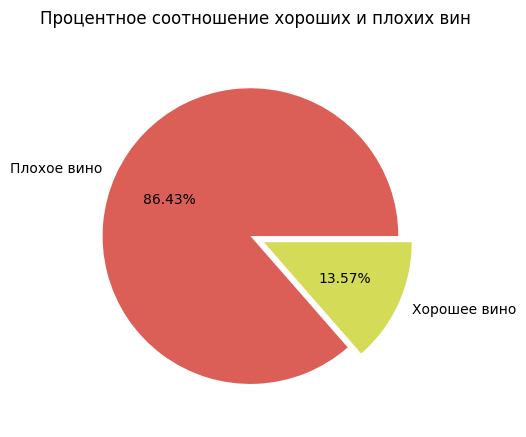

In [11]:
plt.pie(data['quality'].value_counts().values, labels=['Плохое вино', 'Хорошее вино'], autopct="%.2f%%", explode=[0.1, 0], colors=sns.color_palette("hls"))

plt.suptitle('Процентное соотношение хороших и плохих вин')

По круговой диаграмме видно, что хороших вин относительно немного.

# Блок №3 Визуализация

Теперь построем распределение всех вин в зависимости от каждого физико-химического параметра в виде набора гистограмм. Дополнительно, добавим распределение хороших вин от тех же характеристик.

Text(0.5, 0.98, 'Распределение вин по содержанию нелетучих кислот')

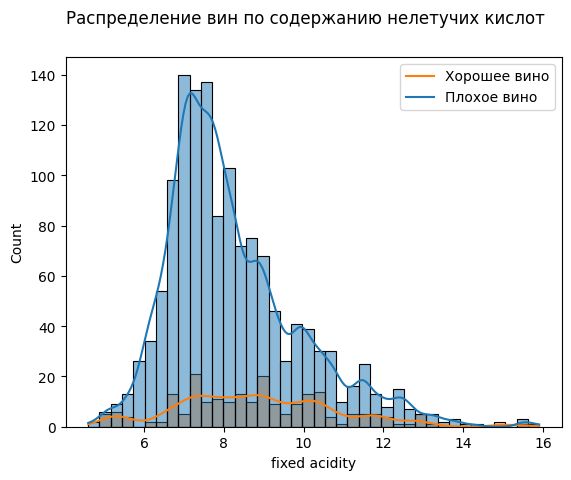

In [12]:
sns.histplot(data=data, x=data['fixed acidity'],hue="quality", kde=True, bins=40, kde_kws={'bw_adjust': 0.5});
plt.legend(['Хорошее вино', 'Плохое вино'])
plt.suptitle('Распределение вин по содержанию нелетучих кислот')

Text(0.5, 0.98, 'Распределение вин по содержанию летучих кислот')

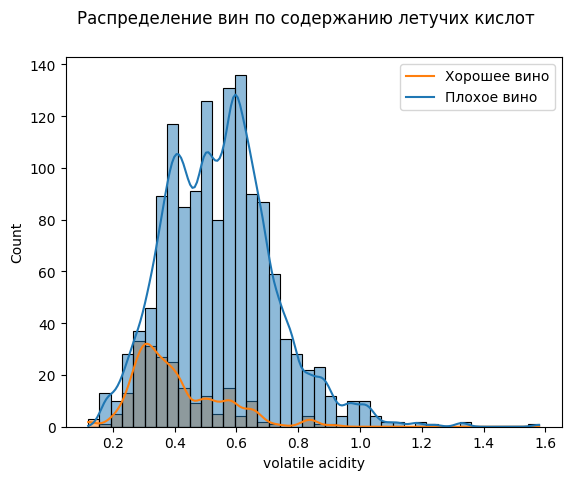

In [13]:
sns.histplot(data=data, x=data['volatile acidity'],hue="quality", kde=True, bins=40, kde_kws={'bw_adjust': 0.5});
plt.legend(['Хорошее вино', 'Плохое вино'])
plt.suptitle('Распределение вин по содержанию летучих кислот')

В виноделии стараются избегать всеми силами образование летучих кислот в вине, т.к. они сильно портят запах и вкус вина. Хорошая аналогия с запахами - лак для ногтей. Поэтому, распределение вин по летучим кислотам дало закономерный результат - чем меньше летучих кислот, тем выше оценка вина.

Text(0.5, 0.98, 'Распределение вин по содержанию лимонной кислоты')

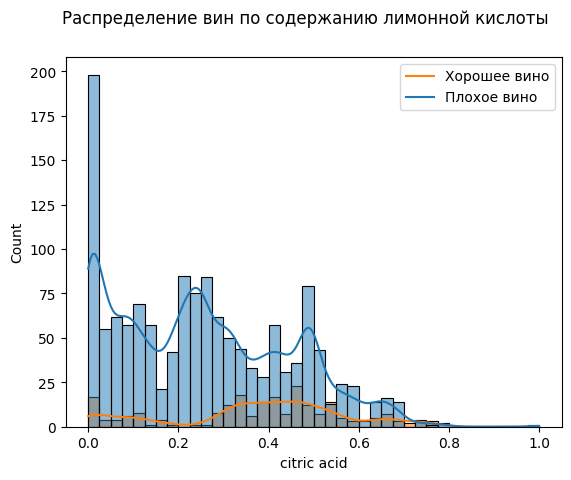

In [14]:
sns.histplot(data=data, x=data['citric acid'],hue="quality", kde=True, bins=40, kde_kws={'bw_adjust': 0.5});
plt.legend(['Хорошее вино', 'Плохое вино'])
plt.suptitle('Распределение вин по содержанию лимонной кислоты')

Text(0.5, 0.98, 'Распределение вин по содержанию сахара')

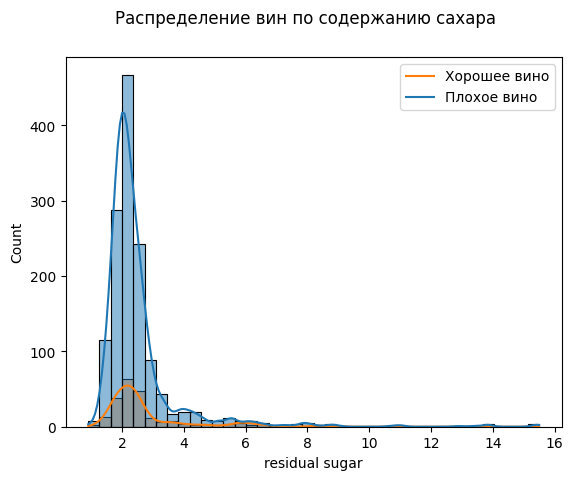

In [15]:
sns.histplot(data=data, x=data['residual sugar'],hue="quality", kde=True, bins=40, kde_kws={'bw_adjust': 0.5});
plt.legend(['Хорошее вино', 'Плохое вино'])
plt.suptitle('Распределение вин по содержанию сахара')

Text(0.5, 0.98, 'Распределение вин по содержанию хлоридов')

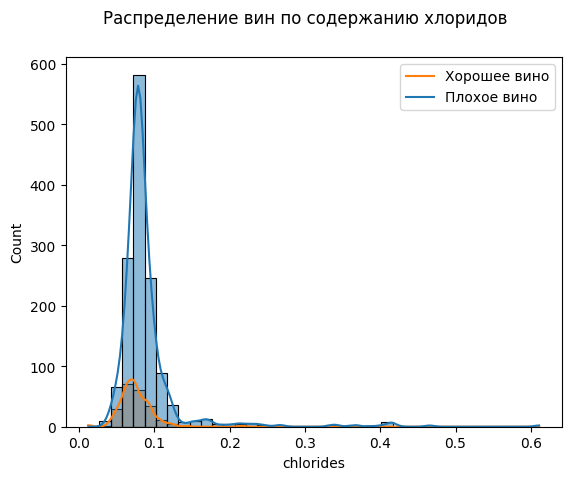

In [16]:
sns.histplot(data=data, x=data['chlorides'],hue="quality", kde=True, bins=40, kde_kws={'bw_adjust': 0.5});
plt.legend(['Хорошее вино', 'Плохое вино'])
plt.suptitle('Распределение вин по содержанию хлоридов')

Text(0.5, 0.98, 'Распределение вин по содержанию несвязанного диоксида серы')

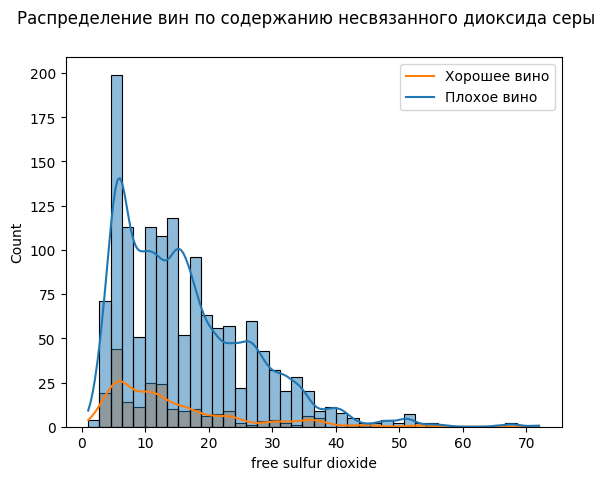

In [ ]:
sns.histplot(data=data, x=data['free sulfur dioxide'],hue="quality", kde=True, bins=40, kde_kws={'bw_adjust': 0.5});
plt.legend(['Хорошее вино', 'Плохое вино'])
plt.suptitle('Распределение вин по содержанию несвязанного диоксида серы')

Text(0.5, 0.98, 'Распределение вин по содержанию диоксида серы')

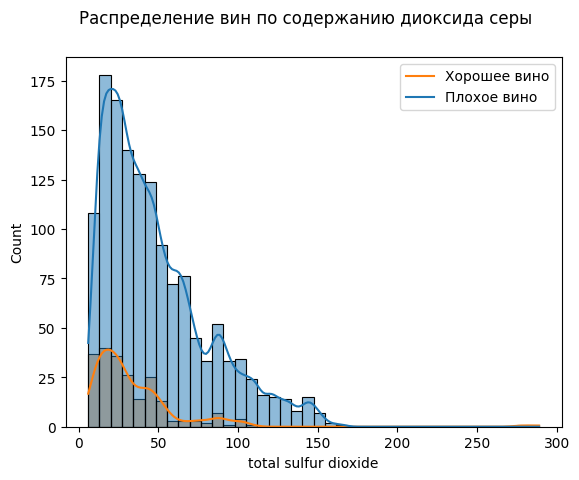

In [ ]:
sns.histplot(data=data, x=data['total sulfur dioxide'],hue="quality", kde=True, bins=40, kde_kws={'bw_adjust': 0.5});
plt.legend(['Хорошее вино', 'Плохое вино'])
plt.suptitle('Распределение вин по содержанию диоксида серы')

Text(0.5, 0.98, 'Распределение вин по плотности')

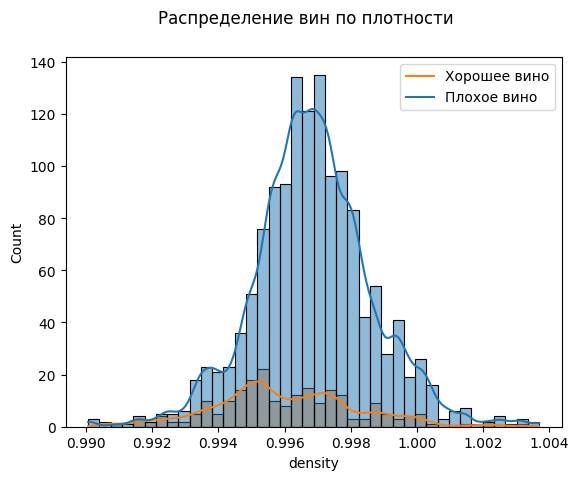

In [ ]:
sns.histplot(data=data, x=data['density'],hue="quality", kde=True, bins=40, kde_kws={'bw_adjust': 0.5});
plt.legend(['Хорошее вино', 'Плохое вино'])
plt.suptitle('Распределение вин по плотности')

Text(0.5, 0.98, 'Распределение вин по уровню pH')

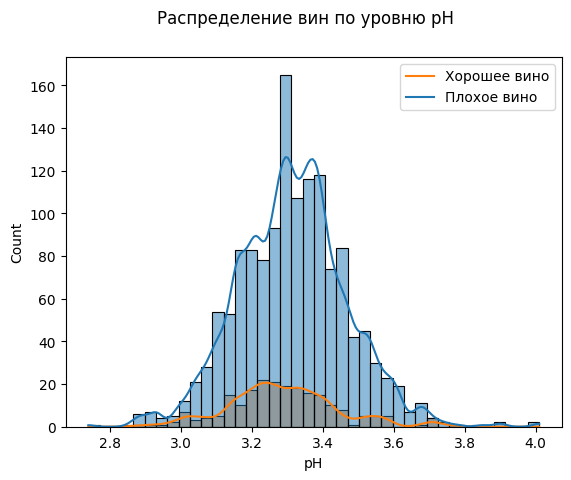

In [ ]:
sns.histplot(data=data, x=data['pH'],hue="quality", kde=True, bins=40, kde_kws={'bw_adjust': 0.5});
plt.legend(['Хорошее вино', 'Плохое вино'])
plt.suptitle('Распределение вин по уровню pH')

Text(0.5, 0.98, 'Распределение вин по содержанию сульфатов')

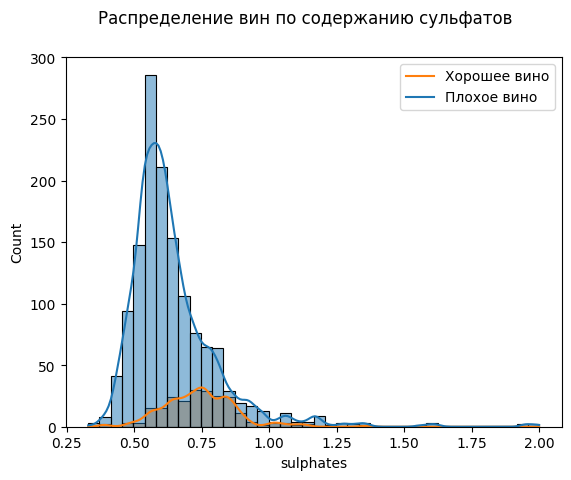

In [ ]:
sns.histplot(data=data, x=data['sulphates'],hue="quality", kde=True, bins=40, kde_kws={'bw_adjust': 0.5});
plt.legend(['Хорошее вино', 'Плохое вино'])
plt.suptitle('Распределение вин по содержанию сульфатов')

Text(0.5, 0.98, 'Распределение вин по содержанию алкоголя')

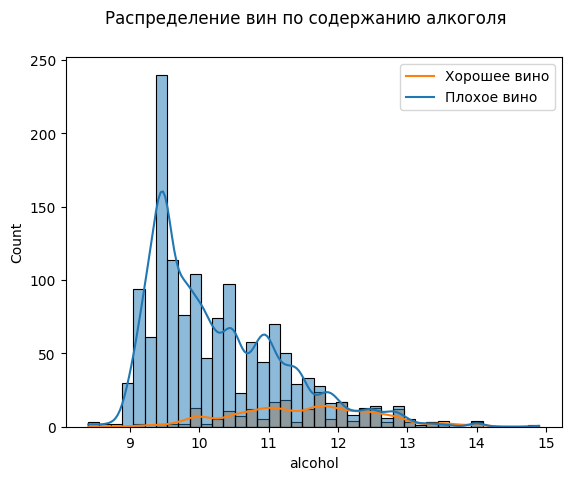

In [ ]:
sns.histplot(data=data, x=data['alcohol'],hue="quality", kde=True, bins=40, kde_kws={'bw_adjust': 0.5});
plt.legend(['Хорошее вино', 'Плохое вино'])
plt.suptitle('Распределение вин по содержанию алкоголя')

Text(0.5, 0.98, 'Коррелограмма физико-химических параметров вина')

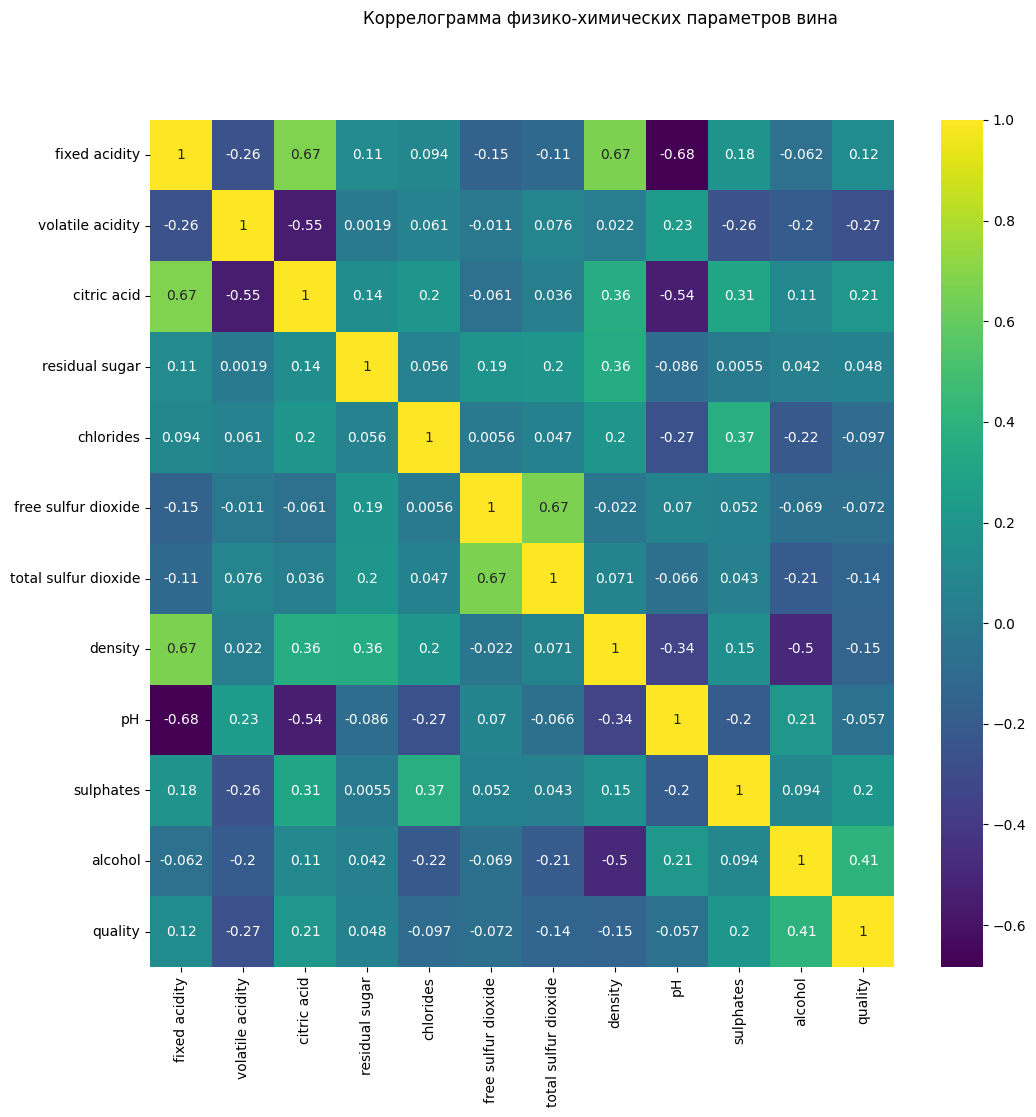

In [17]:
plt.figure(figsize=(12, 11))

sns.heatmap(data.corr(),  cmap = 'viridis',annot = True)
plt.suptitle('Коррелограмма физико-химических параметров вина')

Основные данные, которые сильно коллерилируют между собой:
1. Содержание фиксированной (нелетучей) кислоты и лимонной кислоты - это корректно, т.к. лимонная кислота является одной из нелетучих кислот
2. pH и содержание нелетучих кислот - тоже вполне ясно, чем больше кислоты, тем кислее вино, и, следовательно, ниже значение pH
3. Плотность вина и содержание нелетучих кислот - всё тоже ясно, плотность, к примеру, винной кислоты - 1.76 г/см³, что больше плотности воды (1 г/см³)
4. Алкоголь и субъективное качество - интересная корреляция:)
Может быть, это обусловлено тем, что в выборке рассматиривается большое количество вин с низким содержанием алкоголя - 9-10%, что довольно нестандартно, т.к. наиболее ходовые вина - 12-14%. Будет интересно получить данные по десертным винам и портвейнам (алкоголь - 16-20%) и добавить к текущим данным, и посмотреть на изменения корреляции.

# Блок №4 Построение модели

В данном блоке будем обучать модель на решение задачи классификации вина по физико-химическим параметрам. В результате система должна выдать точность своего предсказания на основе параметров вина.

In [26]:
X=data.drop ('quality',axis=1)
Y=data['quality']

Разбиваем данные на тестовую и обучающие выборки

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test  = train_test_split(X, Y, test_size = 0.25)

Обучаем модель и получаем результат. В качестве метрики используется сравнительная точность (сравниваются результат предсказания с тестовой выборкой, в качестве результата система выдаёт отношение совпавших результатов ко всей выборке). В качестве базовой модели обучения была выбрана логистическая регрессия.

In [56]:
from sklearn.linear_model import LogisticRegression
Class_Pred = LogisticRegression()
Class_Pred.fit(X_train, Y_train)
Y_pred = Class_Pred.predict(X_test)
from sklearn.metrics import accuracy_score
print('Точность предсказания по методу accuracy: {:0.2%}'.format(accuracy_score(Y_test, Y_pred)))

Точность предсказания по методу accuracy: 88.75%


Дополнительно введём метод Precision & Recall чтобы определить полноту и точность выборки

In [57]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
confusion_matrix(Y_test, Y_pred)

array([[342,   5],
       [ 40,  13]])

Получилось, что обученная модель даёт много ложно отрицательных ответов. Возможно, что стоит в будущем попробовать использовать другие модели машинного обучения (к примеру, древо решений)

In [62]:
print('Точность предсказания по методу Precision: {:0.2%}'.format(precision_score(Y_test, Y_pred, zero_division=0)))
print('Полнота предсказания по методу Recall: {:0.2%}'.format(recall_score(Y_test, Y_pred)))

Точность предсказания по методу Precision: 72.22%
Полнота предсказания по методу Recall: 24.53%
